## DIY img2img sampling function (PipeLine)

cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/data_disk/dyy/miniconda3/envs/Wzz/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


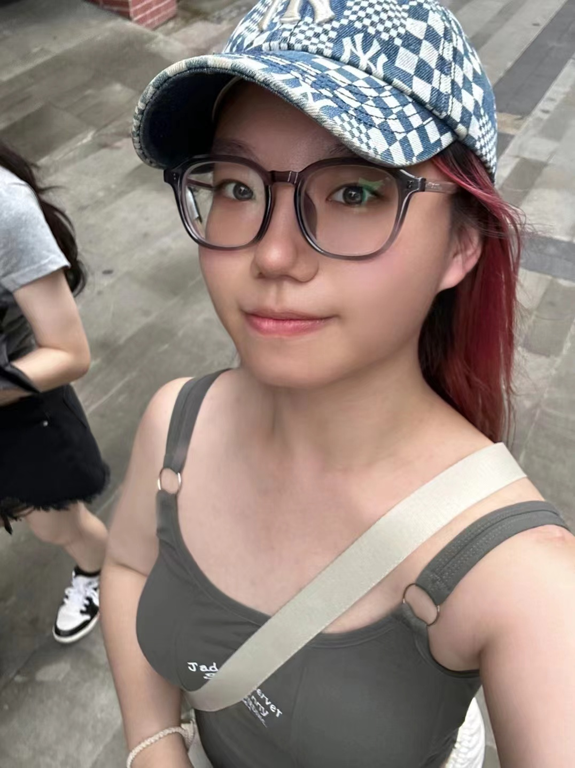

In [1]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
pipe=StableDiffusionImg2ImgPipeline.from_pretrained('/data_disk/dyy/Ghibli-Diffusion',torch_dtype=torch.float16).to(device)

init_image = Image.open("./jpgs/g2.jpg").convert('RGB')
init_image.thumbnail((768, 768))
init_image

In [2]:
prompt = "ghibli style,a young cute girl in summer"
for i in range(9237,9250):
    generator=torch.Generator(device=device).manual_seed(i)
    image=pipe(prompt=prompt,image=init_image,strength=0.5,generator=generator,guidance_scale=7,num_inference_steps=100).images[0]
#strength控制噪声的强度,strength=0.7表示保留0.3的原图,,同时迭代步数也受到影响
    image.save(f"./jpgs/ghibli_style_img23img_{i}.jpg")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]